In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
cena_m = 120000
wzrost_ceny_m = 0.05
czestotliwosc = 12
liczba_lat = 5
kwota_poczatkowa_l = 0
oprocentowanie_l = 0.12

In [3]:
liczba_okresow = czestotliwosc * liczba_lat
wzrost_ceny_msc_m = 0.05 / czestotliwosc
oprocentowanie_msc_l = oprocentowanie_l / czestotliwosc

In [4]:
okresy = np.arange(1, liczba_okresow + 1, dtype=int)

In [5]:
stan_ceny_m = np.around(cena_m * np.array(1 + wzrost_ceny_msc_m) ** okresy, 2)

In [6]:
cel = np.max(stan_ceny_m)

In [7]:
cel

154003.04

In [8]:
kwota_wplacana_na_l = np.around(
    npf.pmt(oprocentowanie_msc_l, liczba_okresow, -cel, 0, "end"), 2
)
kwota_odsetek_na_l = np.around(
    npf.ipmt(oprocentowanie_msc_l, okresy, liczba_okresow, cel, 0, "end"), 2
)

In [9]:
kwota_przyrostu_na_l = kwota_wplacana_na_l + kwota_odsetek_na_l

In [10]:
stan_lokaty = np.cumsum(kwota_przyrostu_na_l)

In [11]:
print(f"1. Cena mieszkania po 5 latach wyniesie: {cel}")
print(f"2. W celu uzbierania na lokatę trzeba wpłacać: {kwota_wplacana_na_l}")

1. Cena mieszkania po 5 latach wyniesie: 154003.04
2. W celu uzbierania na lokatę trzeba wpłacać: 3425.71


Text(0, 0.5, 'Kwota')

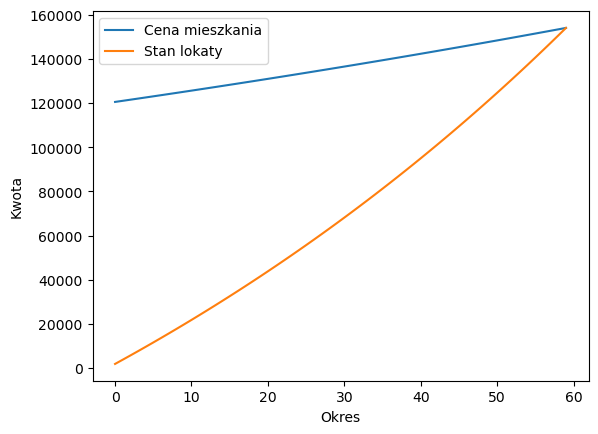

In [12]:
plt.plot(stan_ceny_m, label="Cena mieszkania")
plt.plot(stan_lokaty, label="Stan lokaty")
plt.legend()
plt.xlabel("Okres")
plt.ylabel("Kwota")